In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Carga de datos 

In [2]:
projects_df = pd.read_csv('code_10%_filt.csv',  error_bad_lines=False)
projects_df.shape

(3985822, 8)

#### Busco cuál es projecto con mayor número de bloques (1346 bloques)

In [3]:
max_blocks = projects_df['total-blocks'].max()
max_blocks


1346

#### Dibujar el número total de bloques para cada proyecto (separados por script)

Text(0.5,0.98,'Number of blocks per project')

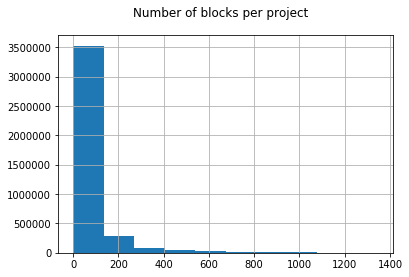

In [4]:
import pylab as pl

projects_df['total-blocks'].hist()
pl.suptitle("Number of blocks per project")


### Correlación entre el número total de bloques y bloques repetidos

Sólo de los proyectos que pertenecen al CSV del 10%. Total:

In [5]:
projects_id = projects_df['projectID'].unique()
projects_id.shape[0]

20061

Primero generamos un DataFrame con el id de un determinado proyecto y el número total de bloques sumados para todos sus scripts.

In [6]:
grouped_data = pd.DataFrame({'total-blocks': projects_df.groupby([ "projectID", "script-rank"]).size()}).reset_index()
blocks_df = pd.DataFrame({'total-blocks': projects_df.groupby([ "projectID"]).size()}).reset_index()
blocks_df

,projectID,total-blocks
0,10519701,9
1,10541430,85
2,10942522,216
3,11823040,3
4,11828235,41
5,12030146,281
6,12237615,41
7,12256407,9
8,12441584,126
9,12596438,161


Generamos un nuevo DataFrame con el id de un determinado proyecto y el número total de bloques diferentes que se emplean en todos sus scripts.

In [7]:

variety_df = pd.DataFrame({'different-blocks': projects_df.groupby([ "projectID"])['block-type'].nunique()}).reset_index()
variety_df['repeated-blocks'] = blocks_df['total-blocks'] - variety_df['different-blocks']
variety_df

,projectID,different-blocks,repeated-blocks
0,10519701,6,3
1,10541430,21,64
2,10942522,20,196
3,11823040,3,0
4,11828235,13,28
5,12030146,47,234
6,12237615,8,33
7,12256407,5,4
8,12441584,39,87
9,12596438,6,155


#### Relacionar el total de bloques empleados con la variedad de bloques y bloques repetidos (para el total de scripts)

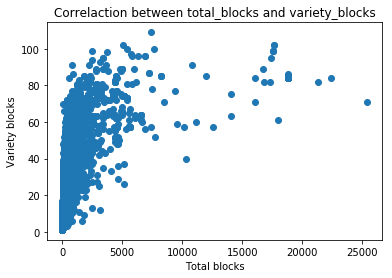

0.530564676638


In [8]:

total_blocks = blocks_df['total-blocks']
variety_blocks = variety_df['different-blocks']
plt.scatter(x=total_blocks, y=variety_blocks)
plt.title("Correlaction between total_blocks and variety_blocks")
plt.xlabel("Total blocks")
plt.ylabel("Variety blocks")
plt.show()
print(total_blocks.corr(variety_blocks)) # Correlación entre bloques totales y bloques diferentes


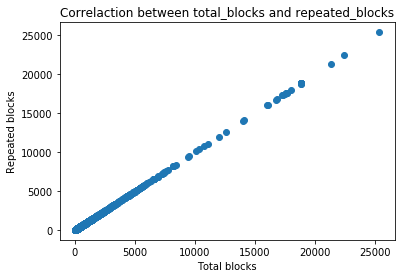

0.999910590022


In [9]:

total_blocks = blocks_df['total-blocks']
repeated_blocks = variety_df['repeated-blocks']
plt.scatter(x=total_blocks, y=repeated_blocks)
plt.title("Correlaction between total_blocks and repeated_blocks")
plt.xlabel("Total blocks")
plt.ylabel("Repeated blocks")
plt.show()
print(total_blocks.corr(repeated_blocks)) # Correlación entre bloques totales y bloques repetidos


### Correlación entre el número total de bloques y bloques repetidos por script

In [10]:
blocks_script_df = pd.DataFrame({'total-blocks': projects_df.groupby([ "projectID", "script-rank"]).size()}).reset_index()
blocks_script_df

,projectID,script-rank,total-blocks
0,10519701,0,3
1,10519701,1,4
2,10519701,2,2
3,10541430,0,4
4,10541430,1,11
5,10541430,2,11
6,10541430,3,4
7,10541430,4,10
8,10541430,5,7
9,10541430,6,7


In [12]:
variety_script_df = pd.DataFrame({'different-blocks': projects_df.groupby([ "projectID", "script-rank"])['block-type'].nunique()}).reset_index()
variety_script_df['repeated-blocks'] = blocks_script_df['total-blocks'] - variety_script_df['different-blocks']
variety_script_df

,projectID,script-rank,different-blocks,repeated-blocks
0,10519701,0,3,0
1,10519701,1,4,0
2,10519701,2,2,0
3,10541430,0,4,0
4,10541430,1,11,0
5,10541430,2,11,0
6,10541430,3,4,0
7,10541430,4,8,2
8,10541430,5,7,0
9,10541430,6,7,0


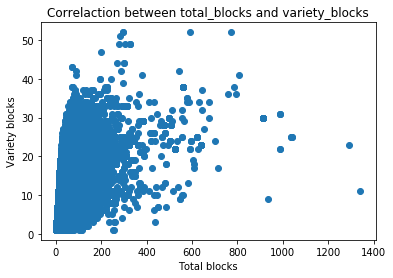

0.611154643267


In [13]:

total_blocks = blocks_script_df['total-blocks']
variety_blocks = variety_script_df['different-blocks']
plt.scatter(x=total_blocks, y=variety_blocks)
plt.title("Correlaction between total_blocks and variety_blocks")
plt.xlabel("Total blocks")
plt.ylabel("Variety blocks")
plt.show()
print(total_blocks.corr(variety_blocks)) # Correlación entre bloques totales y bloques diferentes


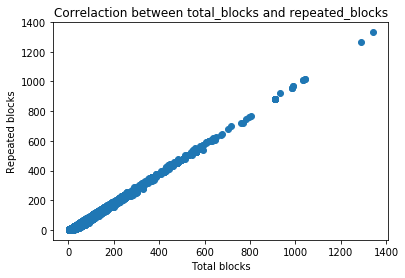

0.985269750229


In [14]:

total_blocks = blocks_script_df['total-blocks']
repeated_blocks = variety_script_df['repeated-blocks']
plt.scatter(x=total_blocks, y=repeated_blocks)
plt.title("Correlaction between total_blocks and repeated_blocks")
plt.xlabel("Total blocks")
plt.ylabel("Repeated blocks")
plt.show()
print(total_blocks.corr(repeated_blocks)) # Correlación entre bloques totales y bloques repetidos por script


### Correlaciones entre el número total de bloques por proyecto y sus metadatos

In [15]:
blocks_df

,projectID,total-blocks
0,10519701,9
1,10541430,85
2,10942522,216
3,11823040,3
4,11828235,41
5,12030146,281
6,12237615,41
7,12256407,9
8,12441584,126
9,12596438,161


#### Busco estos proyectos en el csv de metadatos ( Total: 250163 proyectos)

Carga y limpieza de datos de "metadata.csv"

In [16]:
metadata = pd.read_csv('metadata.csv', error_bad_lines=False)
metadata.shape


(250163, 21)

In [17]:
mask = metadata['p_ID'].isin(blocks_df['projectID'])
metadata_df = metadata.loc[mask]
metadata_df.shape

(20061, 21)

#### Correlación entre el número total de bloques y el número de visitas

No existe ningún tipo de correlación

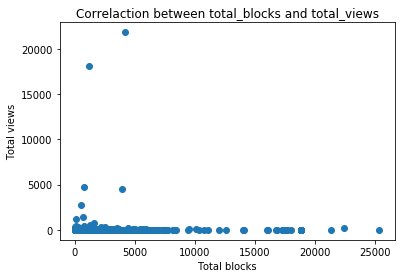

-0.0010000567083


In [20]:
total_blocks = blocks_df['total-blocks']
total_views = metadata_df['total-views']
plt.scatter(x=total_blocks, y=total_views)
plt.title("Correlaction between total_blocks and total_views")
plt.xlabel("Total blocks")
plt.ylabel("Total views")
plt.show()
print(total_blocks.corr(total_views)) # Correlación entre bloques totales y visitas recibidas


#### Correlación entre el número total de bloques y el número de remixes

No existe ningún tipo de correlación

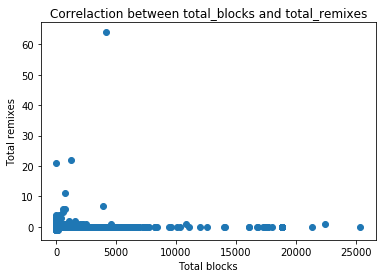

-0.00186447447777


In [21]:
total_blocks = blocks_df['total-blocks']
total_remixes = metadata_df['total-remixes']
plt.scatter(x=total_blocks, y=total_remixes)
plt.title("Correlaction between total_blocks and total_remixes")
plt.xlabel("Total blocks")
plt.ylabel("Total remixes")
plt.show()
print(total_blocks.corr(total_remixes)) # Correlación entre bloques totales y remixes


#### Correlación entre el número total de bloques y puntuación final


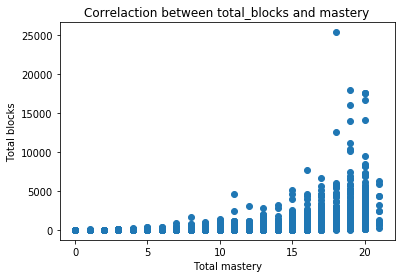

-0.0103624220292


In [22]:
total_blocks = blocks_df['total-blocks']
mastery = metadata_df['Mastery']
plt.scatter(y=total_blocks, x=mastery)
plt.title("Correlaction between total_blocks and mastery")
plt.ylabel("Total blocks")
plt.xlabel("Total mastery")
plt.show()
print(mastery.corr(total_blocks)) # Correlación entre bloques totales y puntuación final


#### Correlación entre el número de bloques diferentes y puntuación final


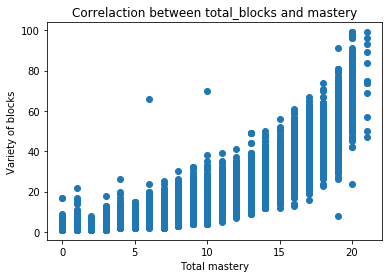

-0.00280169612013


In [27]:
repeated_blocks = variety_df['different-blocks']
mastery = metadata_df['Mastery']
plt.scatter(y=repeated_blocks, x=mastery)
plt.title("Correlaction between total_blocks and mastery")
plt.ylabel("Variety of blocks")
plt.xlabel("Total mastery")
plt.show()
print(mastery.corr(repeated_blocks)) # Correlación entre bloques repetidos y puntuación final


#### Correlación entre metadatos

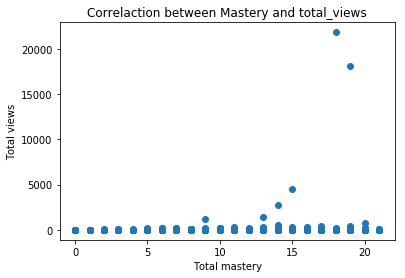

0.03303627376


In [31]:
total_mastery = metadata_df['Mastery']
total_views = metadata_df['total-views']
plt.scatter(x=total_mastery, y=total_views)
plt.title("Correlaction between Mastery and total_views")
plt.xlabel("Total mastery")
plt.ylabel("Total views")
plt.show()
print(total_mastery.corr(total_views)) # Correlación entre puntuación total y visitas

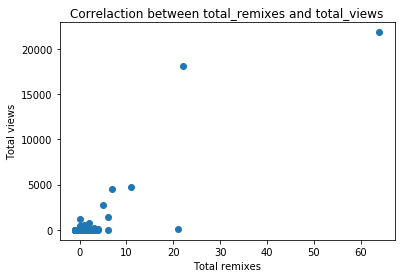

0.857763765645


In [32]:
total_remixes = metadata_df['total-remixes']
total_views = metadata_df['total-views']
plt.scatter(x=total_remixes, y=total_views)
plt.title("Correlaction between total_remixes and total_views")
plt.xlabel("Total remixes")
plt.ylabel("Total views")
plt.show()
print(total_remixes.corr(total_views)) # Correlación entre total remixes y visitas

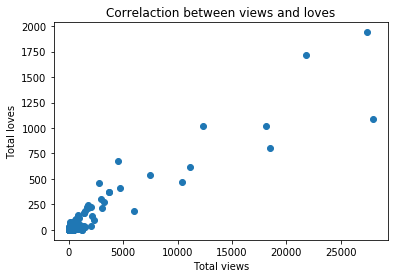

0.937230037397


In [49]:
total_views = projects['total-views']
total_loves = projects['total-loves']
plt.scatter(x=total_views, y=total_loves)
plt.title("Correlaction between views and loves")
plt.xlabel("Total views")
plt.ylabel("Total loves")
plt.show()
print(total_views.corr(total_loves)) # Correlación entre bloques visitas y me gustas

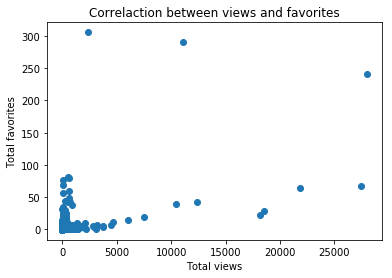

0.94543496764


In [53]:
total_views = projects['total-views']
total_favorites = projects['total-favorites']
plt.scatter(x=total_views, y=total_loves)
plt.title("Correlaction between views and favorites")
plt.xlabel("Total views")
plt.ylabel("Total favorites")
plt.show()
print(total_views.corr(total_favorites)) # Correlación entre visitas y favoritos